## 可视化三维样本数据点的PCA过程

In [1]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

In [3]:
# 在三维空间随机生成100个样本点
np.random.seed(8888)
X_random = np.random.random(size=(100,3))

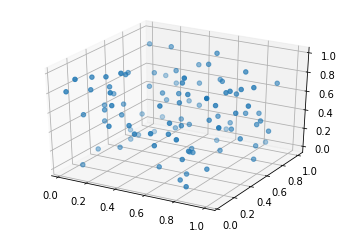

In [9]:
ax = plt.axes(projection='3d')
ax.scatter(X_random[:,0],X_random[:,1],X_random[:,2])
plt.show()

## demean

In [11]:
def demean(X):
    return X - np.mean(X,axis=0)
X = demean(X_random)

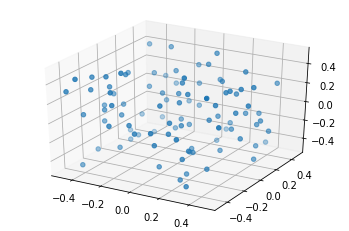

In [13]:
# 中心化
ax = plt.axes(projection='3d')
ax.scatter(X[:,0],X[:,1],X[:,2])
plt.show()

# PCA

In [21]:
def f(w, X):
    return np.sum((X.dot(w)**2)) / len(X)

def df(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

def direction(w):
    return w / np.linalg.norm(w)
    
def first_component(X,initial_w,eta=0.01,n_iters=1e6,epsilon=1e-8):
    w = direction(initial_w)
    cur_iter = 0
    
    while cur_iter < n_iters:
        gradient = df(w,X)
        last_w = w
        w = w + eta*gradient
        w = direction(w)
        if(abs(f(w,X)-  f(last_w,X)) < epsilon):
            break
        cur_iter += 1
        
    return w

In [23]:
initial_w = np.random.random(X.shape[1])
eta= 0.001
w1 = first_component(X,initial_w,eta)
w1 # 求出第一主成分

array([ 0.85072392,  0.37145777, -0.37187087])

In [27]:
# 将原来的所有样本点X去除在第一主成分上的分量，得到X2
X_demean = demean(X)
X2 = np.empty(X_demean.shape)
for i in range(len(X)):
    X2[i] = X[i] - X[i].dot(w1) * w1

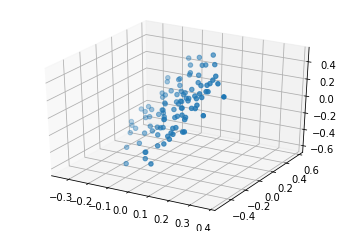

In [28]:
# 绘制X2，此时，X2的所有样本点分布在一个平面上
ax = plt.axes(projection='3d')
ax.scatter3D(X2[:,0], X2[:,1], X2[:,2])
plt.show()

In [29]:
initial_w = np.random.random(X2.shape[1])
w2 = first_component(X2,initial_w)
w2

array([ 0.47762803, -0.25099645,  0.84194551])

In [30]:
# 将X2去除在第二主成分上的分量，得到X3
X3 = np.empty(X2.shape)
for i in range(len(X)):
    X3[i] = X2[i] - X2[i].dot(w2) * w2

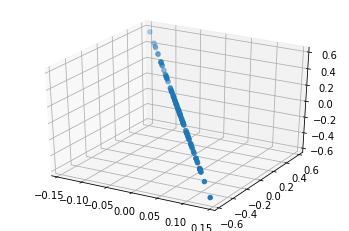

In [31]:
ax = plt.axes(projection='3d')
ax.scatter(X3[:,0],X3[:,1],X3[:,1])
plt.show()